In [4]:
%run utils.ipynb

sns.set(rc={'figure.figsize':(14,8.27)})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### LOAD TRAINED MODELS 

In [5]:
knn_accuracy = pd.read_pickle('trained_models/KNN_accuracy.pkl')
knn_log_loss = pd.read_pickle('trained_models/knn_log_loss.pkl')
logistic_accuracy = pd.read_pickle('trained_models/logistic_regression_accuracy.pkl')
logistic_log_loss = pd.read_pickle('trained_models/logistic_log_loss.pkl')
random_forest_accuracy = pd.read_pickle('trained_models/random_forest_accuracy.pkl')
random_forest_log_loss = pd.read_pickle('trained_models/random_forest_log_loss.pkl')
tree_accuracy = pd.read_pickle('trained_models/tree_accuracy.pkl')
tree_log_loss = pd.read_pickle('trained_models/tree_log_loss.pkl')
xgboost_accuracy = pd.read_pickle('trained_models/xgboot_accuracy.pkl')
xgboost_log_loss = pd.read_pickle('trained_models/xgboost_log_loss.pkl')
final_best_model= pd.read_pickle('trained_models/final_best_model.pkl')
accuracy_models = [knn_accuracy,logistic_accuracy,random_forest_accuracy,tree_accuracy,xgboost_accuracy]
log_loss_models = [knn_log_loss,logistic_log_loss,random_forest_log_loss,tree_log_loss,xgboost_log_loss]
all_models={
    "neg_log_loss":log_loss_models,
    "accuracy":accuracy_models
}

#final_best_model[0][1950][0].__class__.__name__=final_best_model[0][1950][0].__class__.__name__+'Validation'
best_model={"neg_log_loss":[random_forest_log_loss,final_best_model]}

# Functions

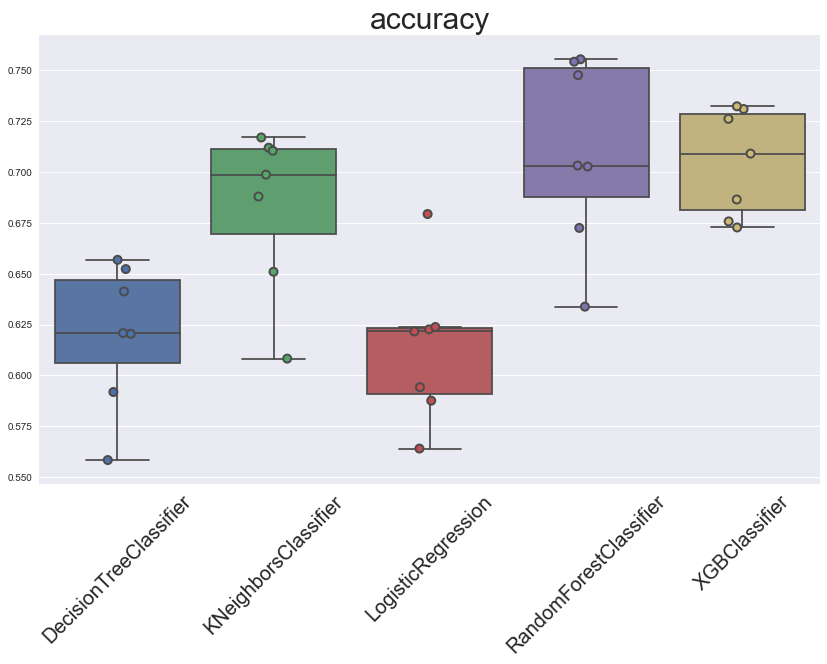

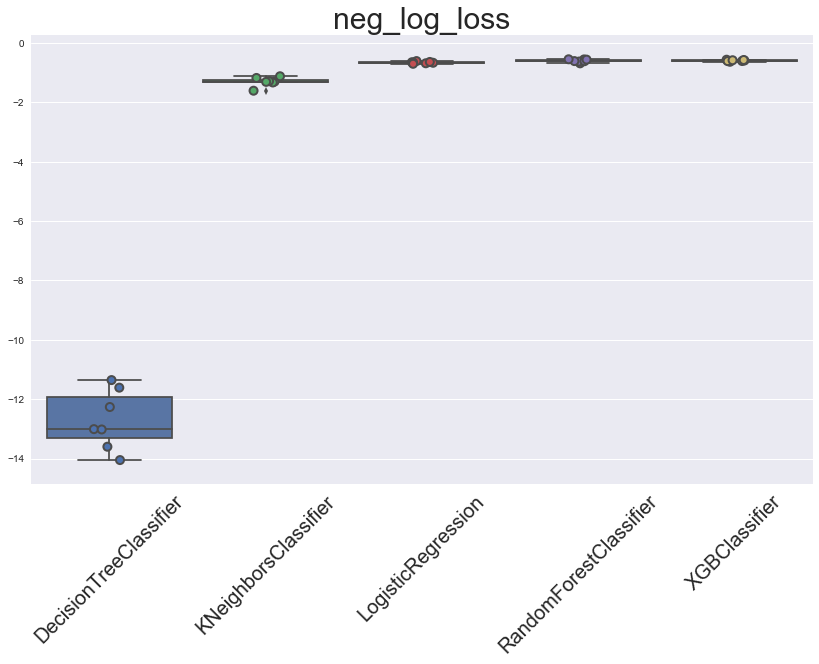

In [6]:
def evaluate_models(all_models,method='accuracy'):
    models = all_models[method]
    data={}
    for model in models:
        model_name=model[0][1950][0].__class__.__name__
        data.update({model_name:model[1]})
    df = pd.DataFrame(data)
    plt.title(method,fontsize=30)
    ax=sns.boxplot(data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=20)
    sns.stripplot(data=df,size=8, jitter=True, edgecolor="gray", linewidth=2)
    return data

z=evaluate_models(all_models,method='accuracy')
plt.figure()
zz=evaluate_models(all_models,method='neg_log_loss')

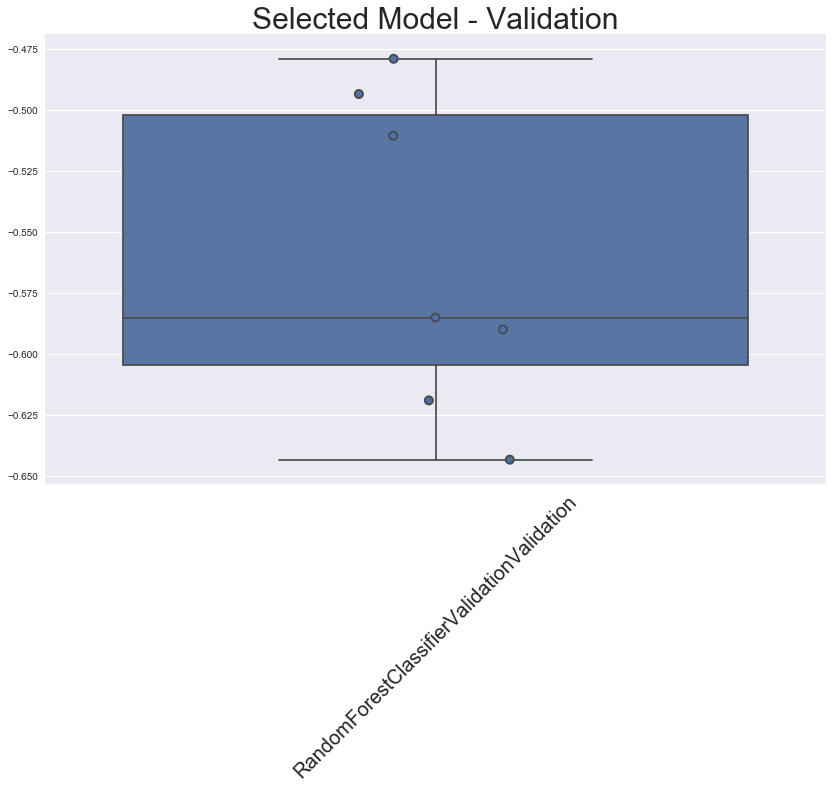

In [15]:
zz=evaluate_models(best_model,method='neg_log_loss')
plt.title('Selected Model - Validation',fontsize=30)